Example from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

- Trains a simple convnet on the MNIST dataset.
- Gets to 99.25% test accuracy after 12 epochs
 (there is still a lot of margin for parameter tuning).
- 16 seconds per epoch on a GRID K520 GPU.

Keras seems to use Theano as backend by default. To change to using TensorFlow, edit ~/.keras/keras.json and replace `theano` with `tensorflow`.

Or set environment value: `KERAS_BACKEND=tensorflow`. 

See https://keras.io/backend/

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


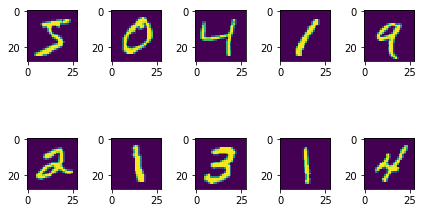

In [4]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_train[i])
fig.tight_layout()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
print(y_test.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(10000,)
(10000, 10)


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 147s - loss: 0.3321 - acc: 0.8982 - val_loss: 0.0821 - val_acc: 0.9754
Epoch 2/12
60000/60000 [==============================] - 149s - loss: 0.1131 - acc: 0.9670 - val_loss: 0.0592 - val_acc: 0.9805
Epoch 3/12
60000/60000 [==============================] - 149s - loss: 0.0881 - acc: 0.9740 - val_loss: 0.0435 - val_acc: 0.9852
Epoch 4/12
60000/60000 [==============================] - 144s - loss: 0.0716 - acc: 0.9786 - val_loss: 0.0405 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 144s - loss: 0.0652 - acc: 0.9813 - val_loss: 0.0391 - val_acc: 0.9874
Epoch 6/12
60000/60000 [==============================] - 144s - loss: 0.0568 - acc: 0.9827 - val_loss: 0.0323 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 149s - loss: 0.0513 - acc: 0.9849 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 8/12
60000/60000 [=======================

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])